# Lesson 8: Object Detection

!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer


**Note:**  `py-espeak-ng` is only available Linux operating systems.

To run locally in a Linux machine, follow these commands:
```
    sudo apt-get update
    sudo apt-get install espeak-ng
    pip install py-espeak-ng
```

### Build the `object-detection` pipeline using 🤗 Transformers Library

- This model was release with the paper [End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872) from Carion et al. (2020)

In [1]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [5]:
# from helper import load_image_from_url, render_results_in_image # Remove or comment out this line

# Import render_results_in_image from the cell where it is defined
# from __main__ import render_results_in_image
# Import summarize_predictions_natural_language from the cell where it is defined
# from __main__ import summarize_predictions_natural_language

In [8]:
from transformers import pipeline

- Here is some code that suppresses warning messages.

In [10]:
from transformers.utils import logging
logging.set_verbosity_error()



In [16]:
od_pipe = pipeline("object-detection", "./models/facebook/detr-resnet-50")

HFValidationError: Repo id must be in the form 'repo_name' or 'namespace/repo_name': './models/facebook/detr-resnet-50'. Use `repo_type` argument if needed.

Info about [facebook/detr-resnet-50](https://huggingface.co/facebook/detr-resnet-50)

Explore more of the [Hugging Face Hub for more object detection models](https://huggingface.co/models?pipeline_tag=object-detection&sort=trending)

### Use the Pipeline

In [11]:
from PIL import Image

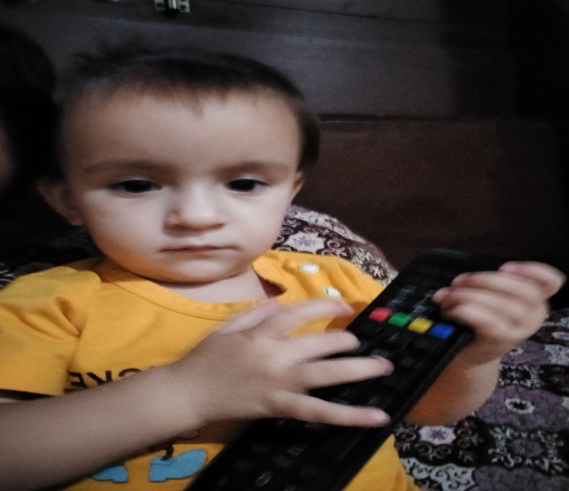

In [13]:
raw_image = Image.open('/content/sample_data/IMG20210922181007.jpg')
raw_image.resize((569, 491))

In [14]:
pipeline_output = od_pipe(raw_image)

NameError: name 'od_pipe' is not defined

- Return the results from the pipeline using the helper function `render_results_in_image`.

In [6]:
def render_results_in_image(image, predictions, color=(255, 0, 0), width=3):
    """
    Draw bounding boxes and labels on a PIL image.

    Args:
        image (PIL.Image.Image): The input image.
        predictions (list): A list of dictionaries, each containing 'box', 'label', and 'score'.
        color (tuple): The color of the bounding boxes and text (R, G, B).
        width (int): The width of the bounding box lines.

    Returns:
        PIL.Image.Image: The image with bounding boxes and labels drawn.
    """
    draw = ImageDraw.Draw(image)
    for prediction in predictions:
        box = prediction['box']
        label = prediction['label']
        score = prediction['score']

        xmin, ymin, xmax, ymax = box.values()
        draw.rectangle([(xmin, ymin), (xmax, ymax)], outline=color, width=width)
        draw.text((xmin, ymin), f"{label}: {score:.2f}", fill=color)
    return image

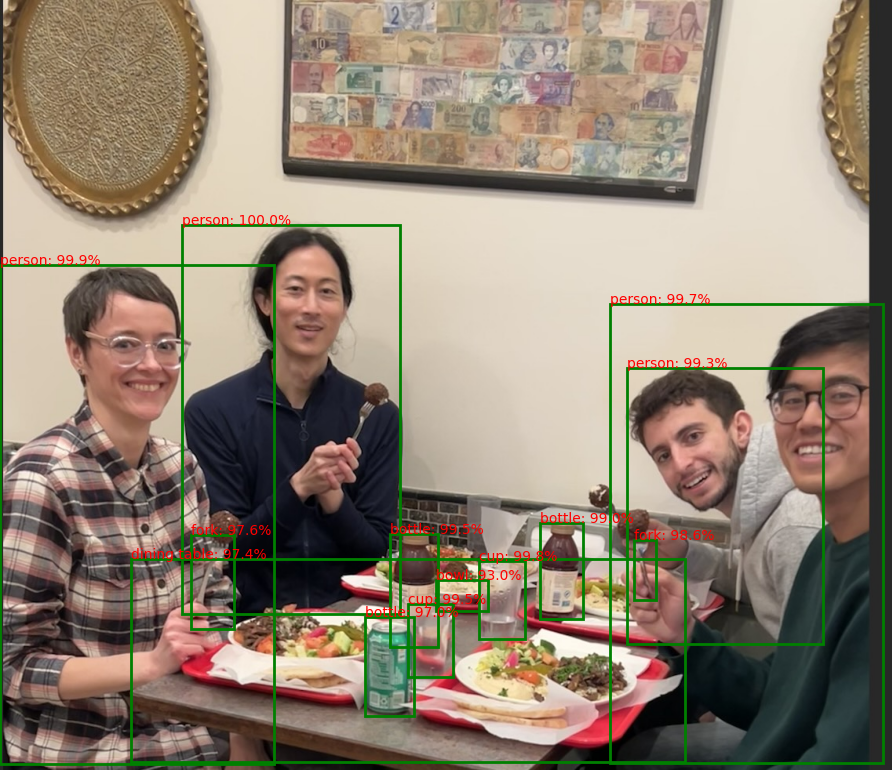

In [ ]:
processed_image

### Using `Gradio` as a Simple Interface

- Use [Gradio](https://www.gradio.app) to create a demo for the object detection app.
- The demo makes it look friendly and easy to use.
- You can share the demo with your friends and colleagues as well.

In [ ]:
import os
import gradio as gr

In [ ]:
def get_pipeline_prediction(pil_image):

    pipeline_output = od_pipe(pil_image)

    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [ ]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image",
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

IMPORTANT: You are using gradio version 4.16.0, however version 4.44.1 is available, please upgrade.
--------


- `share=True` will provide an online link to access to the demo

In [ ]:
demo.launch(share=True, server_port=int(os.environ['PORT1']))

Running on local URL:  https://0.0.0.0:8000
Running on public URL: https://555287084b9ba95f6b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
demo.close()

Closing server running on port: 8000


### Close the app
- Remember to call `.close()` on the Gradio app when you're done using it.

### Make an AI Powered Audio Assistant

- Combine the object detector with a text-to-speech model that will help dictate what is inside the image.

- Inspect the output of the object detection pipeline.

In [ ]:
pipeline_output

[{'score': 0.98568195104599,
  'label': 'fork',
  'box': {'xmin': 808, 'ymin': 688, 'xmax': 836, 'ymax': 765}},
 {'score': 0.9904230833053589,
  'label': 'bottle',
  'box': {'xmin': 688, 'ymin': 667, 'xmax': 743, 'ymax': 789}},
 {'score': 0.9948464632034302,
  'label': 'cup',
  'box': {'xmin': 520, 'ymin': 770, 'xmax': 577, 'ymax': 863}},
 {'score': 0.9971936941146851,
  'label': 'person',
  'box': {'xmin': 778, 'ymin': 387, 'xmax': 1125, 'ymax': 972}},
 {'score': 0.9695367217063904,
  'label': 'bottle',
  'box': {'xmin': 465, 'ymin': 786, 'xmax': 527, 'ymax': 912}},
 {'score': 0.9300817251205444,
  'label': 'bowl',
  'box': {'xmin': 556, 'ymin': 739, 'xmax': 622, 'ymax': 779}},
 {'score': 0.9995697140693665,
  'label': 'person',
  'box': {'xmin': 231, 'ymin': 286, 'xmax': 510, 'ymax': 783}},
 {'score': 0.99920254945755,
  'label': 'person',
  'box': {'xmin': 0, 'ymin': 338, 'xmax': 349, 'ymax': 974}},
 {'score': 0.9742274880409241,
  'label': 'dining table',
  'box': {'xmin': 167, 'ym

In [ ]:
od_pipe

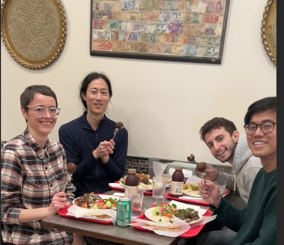

In [ ]:
raw_image = Image.open('huggingface_friends.jpg')
raw_image.resize((284, 245))

In [7]:
def summarize_predictions_natural_language(predictions):
    """
    Summarize the object detection predictions in natural language.

    Args:
        predictions (list): A list of dictionaries, each containing 'box', 'label', and 'score'.

    Returns:
        str: A natural language summary of the detected objects.
    """
    if not predictions:
        return "No objects detected in the image."

    # Count the occurrences of each object label
    label_counts = {}
    for prediction in predictions:
        label = prediction['label']
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

    # Generate the natural language summary
    summary = "In this image, there are "
    items = []
    for label, count in label_counts.items():
        # Use inflect to handle pluralization
        if count == 1:
            items.append(f"one {label}")
        else:
            items.append(f"{inflect.engine().number_to_words(count)} {inflect.engine().plural(label)}")

    summary += ", ".join(items) + "."
    return summary

In [ ]:
text = summarize_predictions_natural_language(pipeline_output)

In [ ]:
text

'In this image, there are two forks three bottles two cups four persons one bowl and one dining table.'

### Generate Audio Narration of an Image

In [ ]:
tts_pipe = pipeline("text-to-speech",
                    model="./models/kakao-enterprise/vits-ljs")

More info about [kakao-enterprise/vits-ljs](https://huggingface.co/kakao-enterprise/vits-ljs).

In [ ]:
narrated_text = tts_pipe(text)

### Play the Generated Audio

In [ ]:
from IPython.display import Audio as IPythonAudio

In [ ]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

### Try it yourself!
- Try these models with other images!